In [1]:
import cProfile
from io import StringIO
import pstats

import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 2048
p = 0

sim = AdvectionSolver(
    ic=lambda idx, x, y, z: ic.square(idx, x, y, z, vx=2, vy=1),
    nx=N,
    ny=N,
    p=p,
    interpolation_scheme="transverse",
    cupy=True,
    log_every_step=False,
)

In [3]:
pr = cProfile.Profile()
pr.enable()
sim.run(n=5)
pr.disable()

s = StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats("cumtime")
ps.print_stats()

with open("profile_output.out", "w") as f:
    f.write(s.getvalue())

100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


In [4]:
sim.timer.print_report()

Category                                    Calls      Cumulative Time
------------------------------------------------------------------------
!ExplicitODESolver.integrate.body               1                 0.93
!FiniteVolumeSolver.run                         1                 1.66
AdvectionSolver.advection_upwind               10                 0.02
AdvectionSolver.compute_dt                      5                 0.02
AdvectionSolver.log_quantity                    1                 0.00
ExplicitODESolver.integrate                     1                 1.66
ExplicitODESolver.minisnapshot                  6                 0.00
ExplicitODESolver.take_step                     5                 0.92
FiniteVolumeSolver.f                            5                 0.83
FiniteVolumeSolver.minisnapshot                 6                 0.00
FiniteVolumeSolver.snapshot                     2                 0.73
current_step                                    0                 0.00



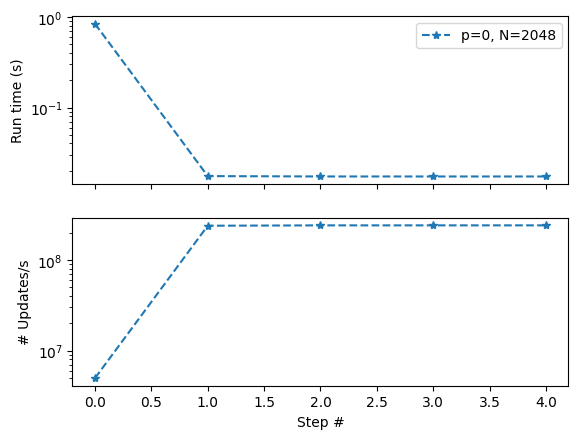

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[1].set_xlabel("Step #")
axs[0].set_ylabel("Run time (s)")
axs[1].set_ylabel("# Updates/s")
axs[0].set_yscale("log")
axs[1].set_yscale("log")

axs[0].plot(
    sim.minisnapshots["run_time"][1:], linestyle="--", marker="*", label=f"{p=}, {N=}"
)
axs[1].plot(
    np.array(sim.minisnapshots["n_updates"])[1:]
    / np.array(sim.minisnapshots["run_time"])[1:],
    linestyle="--",
    marker="*",
    label=f"{p=}, {N=}",
)

axs[0].legend()

/home/jp7427/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.499755859375.
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.499755859375.
  warnings.warn(


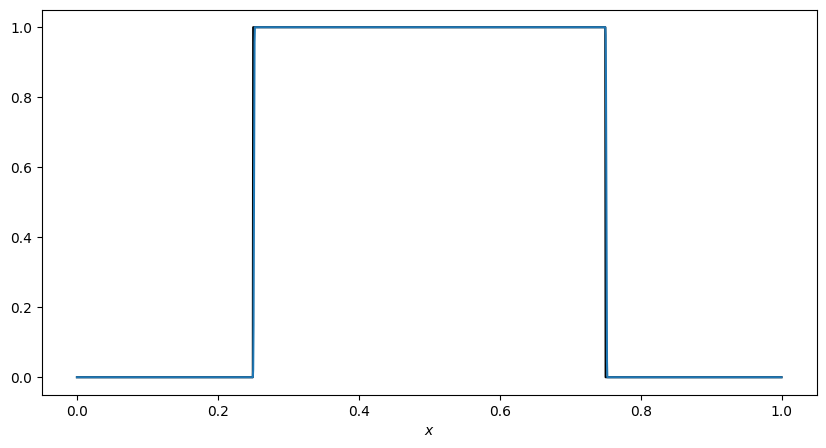

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, xlabel=True)